In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42) # to make this code example reproducible 
m = 100 # number of instances
X = 4 * np.random.rand(m, 1) # column vector
y = 4 + 2 * X + np.random.randn(m, 1)  # column vector

(100, 2) (2, 1)
[[3.21182293]] [2.28714429]
[[ 3.21182293]
 [12.3604001 ]]


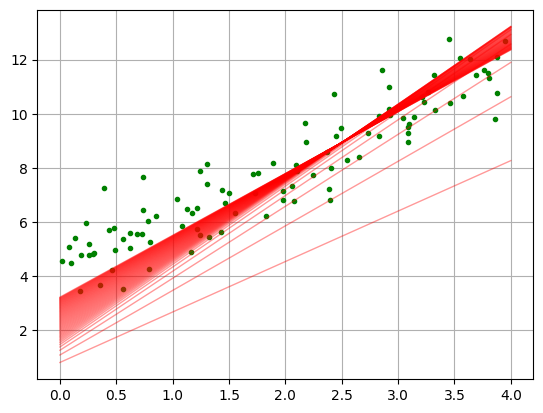

In [29]:
class BatchGradientDescentRegression():
    def __init__(self, n_iter, lr, seed = None) -> None:
        self.n_iter = n_iter
        self.lr = lr
        if seed is not None:
            np.random.seed = seed

    def __add_bias(self, X):
        return np.concatenate((X,  np.expand_dims(np.ones(X.T.shape[-1]), axis=1)),axis=1)
  
    def fit(self, X, y):
        X_b = self.__add_bias(X)
        self.theta = np.random.rand(X_b.shape[1], 1)
        m = len(X_b)
        print(X_b.shape, self.theta.shape)
        for i in range(self.n_iter):
            mse = (2/m) * X_b.T @ (X_b @ self.theta - y)
            self.theta = self.theta - self.lr * mse

            plt.plot(np.array([[0], [4]]), self.predict(np.array([[0], [4]])), "r-", alpha=0.4,linewidth=1.0)

        self.intercept_ = self.theta[0]
        self.coef_ = self.theta[1:]

    def predict(self, X):
        return self.__add_bias(X) @ self.theta
    

plt.plot(X, y, "g.", label="Predictions")

bgd = BatchGradientDescentRegression(n_iter=55, lr=0.04)
bgd.fit(X, y)
print(bgd.coef_, bgd.intercept_)
X_test = np.array([[0], [4]])

y_pred = bgd.predict(X_test)
print(y_pred)

#plt.scatter(X.T, y.T, marker="r")


# plt.scatter(X, y)
plt.grid(True)
plt.show()

(100, 2) (2, 1)
0.03355704697986577
0.020080321285140562
0.014326647564469915
0.011135857461024499
0.009107468123861567
0.007704160246533128
0.006675567423230975
0.005889281507656066
0.005268703898840885
0.004766444232602479
[[4.21061855]] [1.92840563]
[[ 4.21061855]
 [11.92424106]]


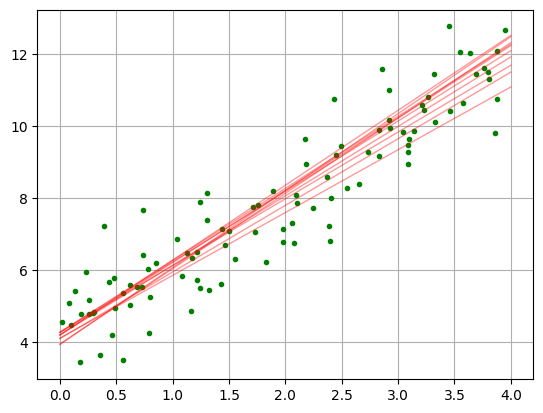

In [34]:
class SGDRegression():
    def __init__(self, n_iter, lr0, lr1, seed = None) -> None:
        self.n_iter = n_iter

        self.lr0 = lr0
        self.lr1 = lr1

        if seed is not None:
            np.random.seed = seed

    def __add_bias(self, X):
        return np.concatenate((X,  np.expand_dims(np.ones(X.T.shape[-1]), axis=1)),axis=1)
    
    def learning_schedule(self, t):
        return self.lr0 / (t + self.lr1)

    def fit(self, X, y):
        X_b = self.__add_bias(X)
        self.theta = np.random.rand(X_b.shape[1], 1)
        m = len(X_b)
        print(X_b.shape, self.theta.shape)
        for epoch in range(self.n_iter):
            for iteration in range(m):
                sample_index =  np.random.randint(m)
                Xi = X_b[sample_index: sample_index+1]
                yi = y[sample_index: sample_index+1]

                mse = 2 * Xi.T @ (Xi @ self.theta - yi)
                eta = self.learning_schedule(epoch * m + iteration)
                self.theta = self.theta - eta * mse
            print(eta)
            plt.plot(np.array([[0], [4]]), self.predict(np.array([[0], [4]])), "r-", alpha=0.4,linewidth=1.0)

        self.intercept_ = self.theta[0]
        self.coef_ = self.theta[1:]

    def predict(self, X):
        return self.__add_bias(X) @ self.theta
    

plt.plot(X, y, "g.", label="Predictions")

bgd = SGDRegression(n_iter=10, lr0=5, lr1=50)
bgd.fit(X, y)
print(bgd.coef_, bgd.intercept_)
X_test = np.array([[0], [4]])

y_pred = bgd.predict(X_test)
print(y_pred)

#plt.scatter(X.T, y.T, marker="r")


# plt.scatter(X, y)
plt.grid(True)
plt.show()

[ 2 19  2  5  1  2 16  8  3  1  8 13 10  1  1  4  6  3 13  1]
(20, 1)
[11  9  0 18 15 14 13  8 14  6  3 17  7 11 14 14 16  1 11  2]
(20, 1)
[ 6  5 13  4  3 14  6  2 12  9  1 11 11 18 18  2  5  1 12  8]
(20, 1)
[12 13 18 10 13 15  9 19 15  1 15 13 17  5  6 12  1 14 16 12]
(20, 1)
[ 6  0  2 19 17  6 16 11 15  9 15 19 17 14 10 17  5  0  6 11]
(20, 1)
[19  3  9  1  8  9 19 10 13  2  0  6  3  6 15  9 14 15  5  3]
(20, 1)
[ 3  3 16 12  1 19  5  0  7 17  3  4  4 14  9  7  6 11 10 12]
(20, 1)
[14 16 17  7  5 10  8  4  6 14  3 18 12  0  0 13  8 11 17  8]
(20, 1)
[ 7 13  8 19  1  0 12  9  7  6 11 16 11 15  9 11 10 13 19 12]
(20, 1)
[ 1 19  6  0  2 19 11  4 11  2 19  4  0 15  8  9  9 12 15 19]
(20, 1)
[ 3 13 16  4 12  2  4 15 18 18 16 17 17  7 17  8 18  9  1 16]
(20, 1)
[12 10 15 19  6  2 15 18 19 15  1 13 19  9 18 10 17 10  8 18]
(20, 1)
[19  9  2  2  7  5 19  0 19  5  1 18  6 10 10  3 19 15  4  6]
(20, 1)
[15 14  4  0 19  8  4  5  2  5  7  5 15 15  2 16  5  5 18 19]
(20, 1)
[14 18  1  7  6  7 1

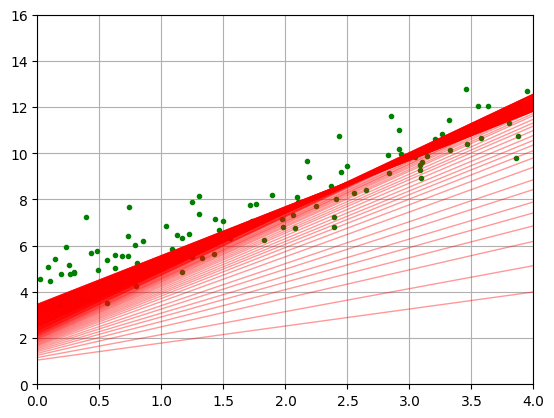

In [35]:
class MiniBatchGradientDescentRegression():
    def __init__(self, n_iter, lr, batch_size, seed = None) -> None:
        self.n_iter = n_iter
        self.lr = lr
        self.batch_size = batch_size
        if seed is not None:
            np.random.seed = seed

    def __add_bias(self, X):
        return np.concatenate((X,  np.expand_dims(np.ones(X.T.shape[-1]), axis=1)),axis=1)
  
    def fit(self, X, y):
        X_b = self.__add_bias(X)
        
        m = len(X_b)
        assert m >= self.batch_size, "Wrong mini batch size"
        if self.batch_size < 1:
            mini_batch_size = m * self.batch_size
        else:
            mini_batch_size = self.batch_size
        
        self.theta = np.random.rand(X_b.shape[1], 1)
        
        for i in range(self.n_iter):
            indx_arr = np.random.randint(0, int(mini_batch_size), int(mini_batch_size))
            print(indx_arr)
            Xmb = X_b[indx_arr]
            print((Xmb @ self.theta - y[indx_arr]).shape)
            mse = (2/mini_batch_size) * Xmb.T @ (Xmb @ self.theta - y[indx_arr])
            self.theta = self.theta - self.lr * mse

            plt.plot(np.array([[0], [4]]), self.predict(np.array([[0], [4]])), "r-", alpha=0.4,linewidth=1.0)

        self.intercept_ = self.theta[0]
        self.coef_ = self.theta[1:]

    def predict(self, X):
        return self.__add_bias(X) @ self.theta
    

plt.plot(X, y, "g.", label="Predictions")
plt.axis([0, 4, 0, 16])
bgd = MiniBatchGradientDescentRegression(n_iter=190, lr=0.01, batch_size=0.2)
bgd.fit(X, y)
print(bgd.coef_, bgd.intercept_)
X_test = np.array([[0], [4]])

y_pred = bgd.predict(X_test)
print(y_pred)

#plt.scatter(X.T, y.T, marker="r")


# plt.scatter(X, y)
plt.grid(True)
plt.show()